In [1]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Unzip the file
zip_path = '/content/fruits-360_100x100.zip'
extract_path = '/content/fruits-360'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Step 2: Define paths
dataset_path = '/content/fruits-360/fruits-360'
train_dir = os.path.join(dataset_path, 'Training')
test_dir = os.path.join(dataset_path, 'Test')

# Image parameters
img_height, img_width = 100, 100
batch_size = 32

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    shear_range=0.1
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

# Get class labels
class_labels = train_generator.class_indices
print("Class labels:", class_labels)


Found 72019 images belonging to 176 classes.
Found 17939 images belonging to 176 classes.
Found 29990 images belonging to 175 classes.
Class labels: {'Apple 10': 0, 'Apple 11': 1, 'Apple 12': 2, 'Apple 13': 3, 'Apple 14': 4, 'Apple 17': 5, 'Apple 18': 6, 'Apple 19': 7, 'Apple 5': 8, 'Apple 6': 9, 'Apple 7': 10, 'Apple 8': 11, 'Apple 9': 12, 'Apple Braeburn 1': 13, 'Apple Core 1': 14, 'Apple Crimson Snow 1': 15, 'Apple Golden 1': 16, 'Apple Golden 2': 17, 'Apple Golden 3': 18, 'Apple Granny Smith 1': 19, 'Apple Pink Lady 1': 20, 'Apple Red 1': 21, 'Apple Red 2': 22, 'Apple Red 3': 23, 'Apple Red Delicious 1': 24, 'Apple Red Yellow 1': 25, 'Apple Red Yellow 2': 26, 'Apple Rotten 1': 27, 'Apple hit 1': 28, 'Apple worm 1': 29, 'Apricot 1': 30, 'Avocado 1': 31, 'Avocado ripe 1': 32, 'Banana 1': 33, 'Banana 3': 34, 'Banana Lady Finger 1': 35, 'Banana Red 1': 36, 'Beans 1': 37, 'Beetroot 1': 38, 'Blackberrie 1': 39, 'Blackberrie 2': 40, 'Blackberrie half rippen 1': 41, 'Blackberrie not rippen

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_labels), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 176)            │        45,232 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,415,536 (13.03 MB)

 Trainable params: 3,415,536 (13.03 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=1  # You can increase based on your needs
)


2251/2251 ━━━━━━━━━━━━━━━━━━━━ 1752s 778ms/step - accuracy: 0.4280 - loss: 2.1305 - val_accuracy: 0.8932 - val_loss: 0.3521


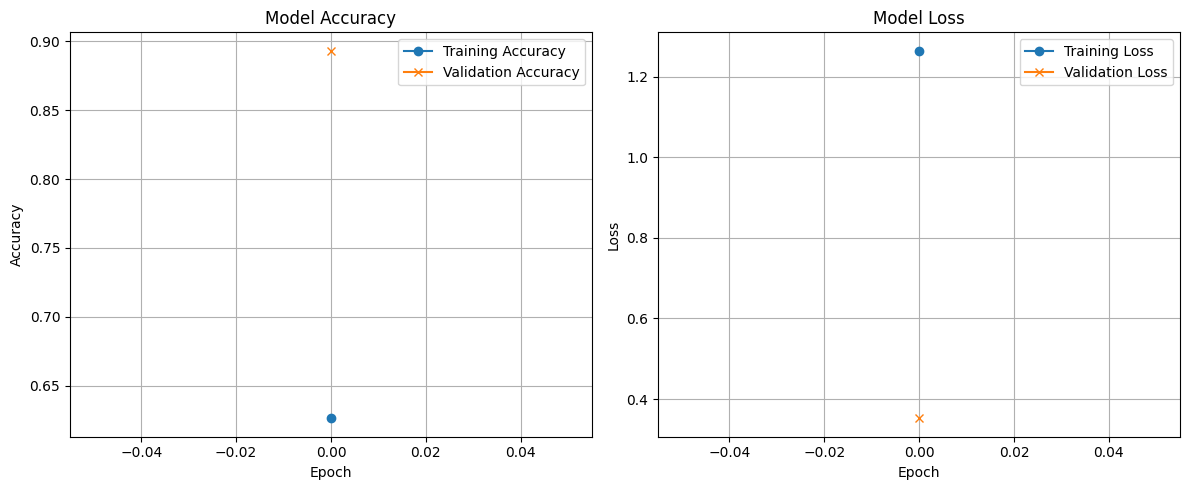

In [5]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [6]:
# Save the entire model to a .h5 file
model.save("fruit_quality_model.h5")
print("✅ Model saved as 'fruit_quality_model.h5'")


✅ Model saved as 'fruit_quality_model.h5'


In [7]:
from tensorflow.keras.models import load_model
model = load_model("fruit_quality_model.h5")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


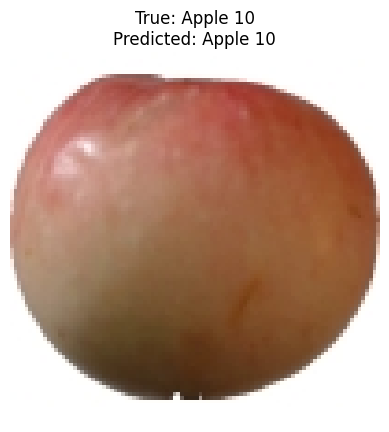

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Get a batch of test images
x_test, y_test = next(test_generator)

# Predict
predictions = model.predict(x_test)
predicted_class = np.argmax(predictions, axis=1)
true_class = np.argmax(y_test, axis=1)

# Get class label mapping
class_indices = {v: k for k, v in train_generator.class_indices.items()}

# Show one image with prediction
plt.imshow(x_test[0])
plt.title(f"True: {class_indices[true_class[0]]}\nPredicted: {class_indices[predicted_class[0]]}")
plt.axis('off')
plt.show()


In [9]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path, model, class_indices):
    img = image.load_img(img_path, target_size=(100, 100))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction[0])

    labels = {v: k for k, v in class_indices.items()}
    return labels[predicted_class]


In [10]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.4 MB/s eta 0:00:00


In [11]:
import streamlit as st
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Load model
model = load_model("fruit_quality_model.h5")

# Class labels (you can load this dynamically too)
class_labels = {
    0: 'Apple 10', 1: 'Apple 11', 2: 'Apple 12', 3: 'Apple 13',
    # ...continue the rest from your label dictionary
    174: 'Zucchini 1', 175: 'Zucchini dark 1'
}

# Prediction function
def predict_fruit(img):
    img = img.resize((100, 100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0

    prediction = model.predict(img)
    class_index = np.argmax(prediction)
    return class_labels[class_index]

# Streamlit UI
st.title("🍎 AI-Powered Fruit Classifier")
st.subheader("Upload a fruit image to analyze quality")

uploaded_file = st.file_uploader("Choose a fruit image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    from PIL import Image
    img = Image.open(uploaded_file)
    st.image(img, caption='Uploaded Image', use_column_width=True)

    with st.spinner("Predicting..."):
        result = predict_fruit(img)
        st.success(f"✅ Predicted: **{result}**")


2025-04-24 18:46:13.399 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 18:46:13.629 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-24 18:46:13.630 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 18:46:13.632 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 18:46:13.633 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 18:46:13.634 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 18:46:13.635 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 18:46:13.639 Thread 'MainThread': mi

In [12]:
!pip install streamlit pyngrok --quiet


In [13]:
%%writefile app.py
import streamlit as st
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image

# Load the trained model
model = load_model("fruit_quality_model.h5")

# Manually add your class_labels dictionary (or load it from a file if saved)
class_labels = {
    0: 'Apple 10', 1: 'Apple 11', 2: 'Apple 12', 3: 'Apple 13',
    4: 'Apple 14', 5: 'Apple 17', 6: 'Apple 18', 7: 'Apple 19',
    # ... (add the rest of your 176 class labels here)
    174: 'Zucchini 1', 175: 'Zucchini dark 1'
}

# Function to predict
def predict_fruit(img):
    img = img.resize((100, 100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0

    prediction = model.predict(img)
    class_index = np.argmax(prediction)
    return class_labels.get(class_index, "Unknown")

# Streamlit UI
st.title("🍎 AI-Powered Fruit Classifier")
st.subheader("Upload a fruit image to analyze its type")

uploaded_file = st.file_uploader("Choose a fruit image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    img = Image.open(uploaded_file)
    st.image(img, caption='Uploaded Image', use_column_width=True)

    with st.spinner("Predicting..."):
        result = predict_fruit(img)
        st.success(f"✅ Predicted: **{result}**")


Writing app.py


In [14]:
!ngrok config add-authtoken 2vfnShFyyaVLFmi2Vc01cbIJ6IJ_65u499QWw9hUDjZnAndqQ


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [15]:
from pyngrok import ngrok

# Kill existing tunnels
ngrok.kill()

# Run Streamlit app
!streamlit run app.py &>/content/logs.txt &

# Wait for the server to start
import time
time.sleep(3)

# Connect ngrok to Streamlit
public_url = ngrok.connect("http://localhost:8501")
print(f"🚀 Streamlit is live at: {public_url}")


🚀 Streamlit is live at: NgrokTunnel: "https://0226-34-66-55-248.ngrok-free.app" -> "http://localhost:8501"


In [16]:
%%writefile app.py
import streamlit as st
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os

# Load model
model = load_model('fruit_classifier.h5')

# Class labels (you can load from a file or define manually if saved)
class_labels = ['Apple 10', 'Apple 11', 'Apple 12', 'Apple 13', 'Apple 14', 'Apple 17', 'Apple 18', 'Apple 19',
                'Apple 5', 'Apple 6', 'Apple 7', 'Apple 8', 'Apple 9', 'Apple Braeburn 1', 'Apple Core 1',
                'Apple Crimson Snow 1', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith 1',
                'Apple Pink Lady 1', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious 1',
                'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apple Rotten 1', 'Apple hit 1', 'Apple worm 1',
                'Apricot 1', 'Avocado 1', 'Avocado ripe 1', 'Banana 1', 'Banana 3', 'Banana Lady Finger 1',
                'Banana Red 1', 'Beans 1', 'Beetroot 1', 'Blackberrie 1', 'Blackberrie 2', 'Blackberrie half rippen 1',
                'Blackberrie not rippen 1', 'Blueberry 1', 'Cabbage red 1', 'Cabbage white 1', 'Cactus fruit 1',
                'Cactus fruit green 1', 'Cactus fruit red 1', 'Caju seed 1', 'Cantaloupe 1', 'Cantaloupe 2',
                'Carambula 1', 'Carrot 1', 'Cauliflower 1', 'Cherimoya 1', 'Cherry 1', 'Cherry 2', 'Cherry Rainier 1',
                'Cherry Wax Black 1', 'Cherry Wax Red 1', 'Cherry Wax Yellow 1', 'Cherry Wax not rippen 1',
                'Chestnut 1', 'Clementine 1', 'Cocos 1', 'Corn 1', 'Corn Husk 1', 'Cucumber 1', 'Cucumber 10',
                'Cucumber 3', 'Cucumber 9', 'Cucumber Ripe 1', 'Cucumber Ripe 2', 'Dates 1', 'Eggplant 1',
                'Eggplant long 1', 'Fig 1', 'Ginger Root 1', 'Gooseberry 1', 'Granadilla 1', 'Grape Blue 1',
                'Grape Pink 1', 'Grape White 1', 'Grape White 2', 'Grape White 3', 'Grape White 4',
                'Grapefruit Pink 1', 'Grapefruit White 1', 'Guava 1', 'Hazelnut 1', 'Huckleberry 1', 'Kaki 1', 'Kiwi 1',
                'Kohlrabi 1', 'Kumquats 1', 'Lemon 1', 'Lemon Meyer 1', 'Limes 1', 'Lychee 1', 'Mandarine 1',
                'Mango 1', 'Mango Red 1', 'Mangostan 1', 'Maracuja 1', 'Melon Piel de Sapo 1', 'Mulberry 1',
                'Nectarine 1', 'Nectarine Flat 1', 'Nut Forest 1', 'Nut Pecan 1', 'Onion Red 1',
                'Onion Red Peeled 1', 'Onion White 1', 'Orange 1', 'Papaya 1', 'Passion Fruit 1', 'Peach 1', 'Peach 2',
                'Peach Flat 1', 'Pear 1', 'Pear 2', 'Pear 3', 'Pear Abate 1', 'Pear Forelle 1', 'Pear Kaiser 1',
                'Pear Monster 1', 'Pear Red 1', 'Pear Stone 1', 'Pear Williams 1', 'Pepino 1', 'Pepper Green 1',
                'Pepper Orange 1', 'Pepper Red 1', 'Pepper Yellow 1', 'Physalis 1', 'Physalis with Husk 1',
                'Pineapple 1', 'Pineapple Mini 1', 'Pistachio 1', 'Pitahaya Red 1', 'Plum 1', 'Plum 2', 'Plum 3',
                'Pomegranate 1', 'Pomelo Sweetie 1', 'Potato Red 1', 'Potato Red Washed 1', 'Potato Sweet 1',
                'Potato White 1', 'Quince 1', 'Quince 2', 'Quince 3', 'Quince 4', 'Rambutan 1', 'Raspberry 1',
                'Redcurrant 1', 'Salak 1', 'Strawberry 1', 'Strawberry Wedge 1', 'Tamarillo 1', 'Tangelo 1',
                'Tomato 1', 'Tomato 2', 'Tomato 3', 'Tomato 4', 'Tomato 5', 'Tomato Cherry Red 1', 'Tomato Heart 1',
                'Tomato Maroon 1', 'Tomato Yellow 1', 'Tomato not Ripened 1', 'Walnut 1', 'Watermelon 1',
                'Zucchini 1', 'Zucchini dark 1']

# Streamlit UI
st.title("🍓 Fruit Classifier")
st.write("Upload an image of a fruit or vegetable and let the model predict it!")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])

if uploaded_file:
    img = image.load_img(uploaded_file, target_size=(100, 100))
    st.image(img, caption='Uploaded Image', use_column_width=True)

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.0

    prediction = model.predict(x)
    predicted_class = class_labels[np.argmax(prediction)]
    confidence = np.max(prediction)

    st.success(f"🌟 Predicted: **{predicted_class}**")
    st.info(f"🔍 Confidence: {confidence:.2%}")


Overwriting app.py


In [17]:
model.save("fruit_classifier.h5")


In [18]:
!ls -lh


total 629M
-rw-r--r-- 1 root root 4.2K Apr 24 18:47 app.py
-rw-r--r-- 1 root root  14M Apr 24 18:47 fruit_classifier.h5
-rw-r--r-- 1 root root  40M Apr 24 18:44 fruit_quality_model.h5
drwxr-xr-x 3 root root 4.0K Apr 24 18:10 fruits-360
-rw-r--r-- 1 root root 577M Apr 24 18:08 fruits-360_100x100.zip
-rw-r--r-- 1 root root  258 Apr 24 18:47 logs.txt
drwxr-xr-x 1 root root 4.0K Apr 23 13:39 sample_data


In [19]:
from pyngrok import ngrok

ngrok.kill()
!streamlit run app.py &>/content/logs.txt &
import time
time.sleep(3)
public_url = ngrok.connect("http://localhost:8501")
print(f"🚀 Streamlit is live at: {public_url}")


🚀 Streamlit is live at: NgrokTunnel: "https://8175-34-66-55-248.ngrok-free.app" -> "http://localhost:8501"
